# RNNs in Depth


When to use RNNs:
- Complex equations:
   - to predict the next value in a time series
   - to model differential equations
- Natural language

RNN adds **memory** to the network so our system considers previous inputs (also referred to as temperoral dependencies).

## RNN history

Feedforward networks can't deal with tempororal dependencies. This is why RNN's are introduced.

The first algorithm to solve this problem was the Time Delay NN (TDNN) proposed by Elman Network. 

RNNs have a key flaw, as capturing relationships that span more than 8 or 10 steps back is practically impossible. This flaw stems from the "vanishing gradient" problem in which the contribution of information decays geometrically over time.

Examples for which RNNs are used for:
- to predict stock price
- question answering
- gesture recognision
- text completion

## Exercise: Design an RNN Problem

Problem: time series forecasting for crime rates. 
Input would be a time series dataframe with the target variable the crime rate.

## Reminder: Feedforward Neural Network. (FFNN)

Task in NN is to find the best set of weights. Start with random weights.

Steps in training phase: 
- **Feedforward**: we calculate the output of the model to get the error
- **Backpropagation**: we change the weights to minimize the error

### Feedforward process

Image having a FFNN with one hidden layer:
- step 1: finding h: the values of the hidden layer and its corresponding weights: the value of h is summing all the weights that are coming to that neuron. 
- step 2: finding y: repeat the same process as above. However, we don't need an activation function but it might be useful in some cases, for example to map the output values between zero and 1 (with a Softmax function).

Activation functions introduce non-linearity. Important since most real-world data is not linear.

Using vector by matrix multiplication the equation looks like:
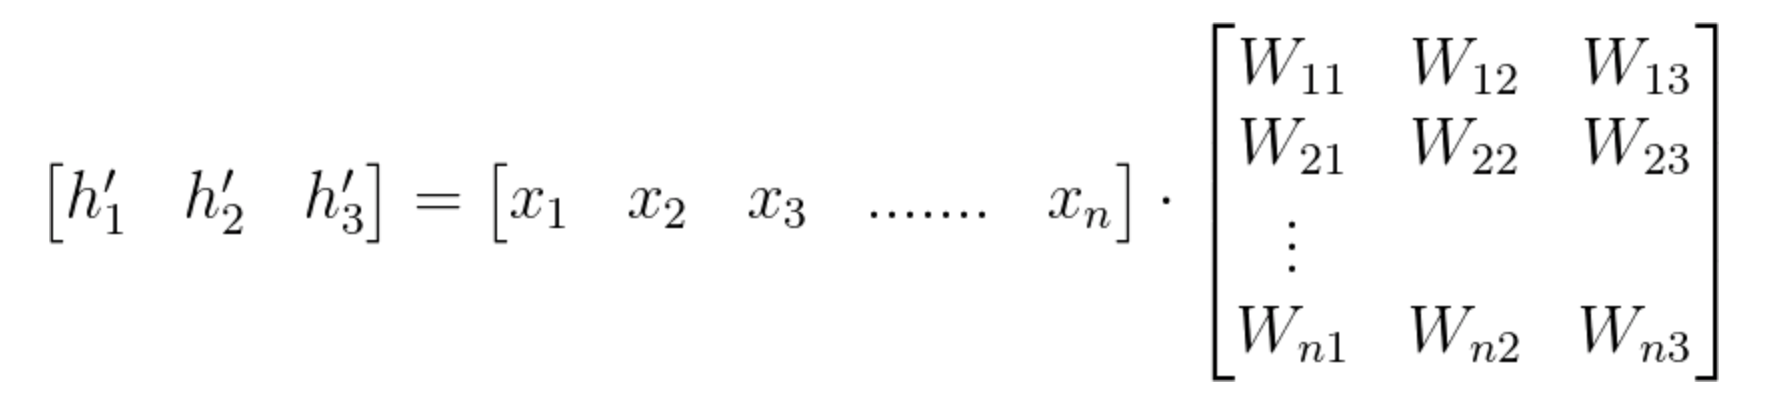!

This is the same as:
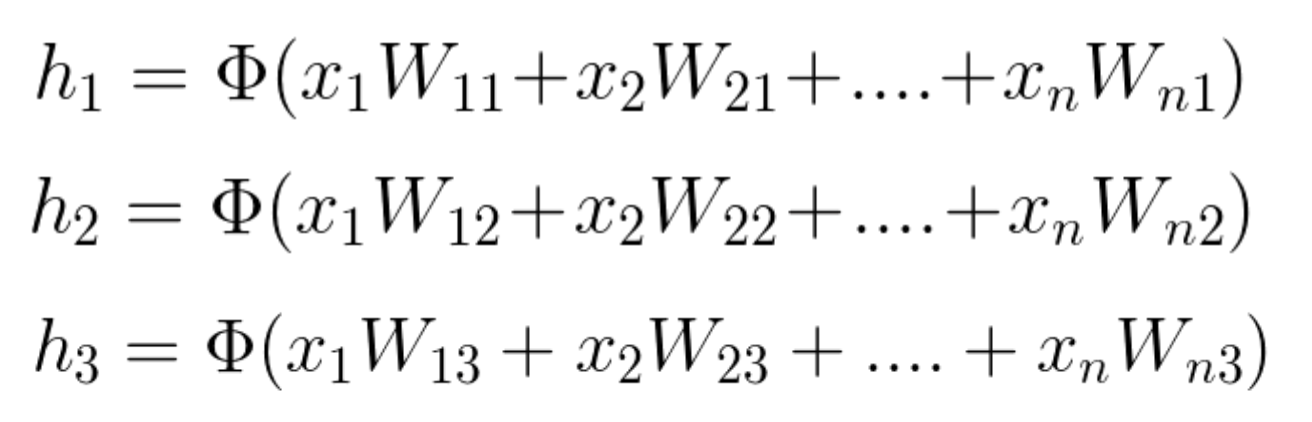!

The number of multiplications that is needed in a feedforward pass is a function of the inputs to the M layer, the interactions between N and M, and the outputs of the N layer: so: `M+N+NM`

### Backpropagation theory

Backpropagation is the process of minimizing the network error by slightly adjusting the weights in each iteration.
= **Stochastic Gradient Descent with the Chain Rule**

If gradient (derivative) is negative, we have to increase the weight.

Why using the partial derivative: this allows us to measure how the error is impacted by each weight seperately. We calculate the derivative of the error with respect to the derivates of the weights. 

**Chain rule:**
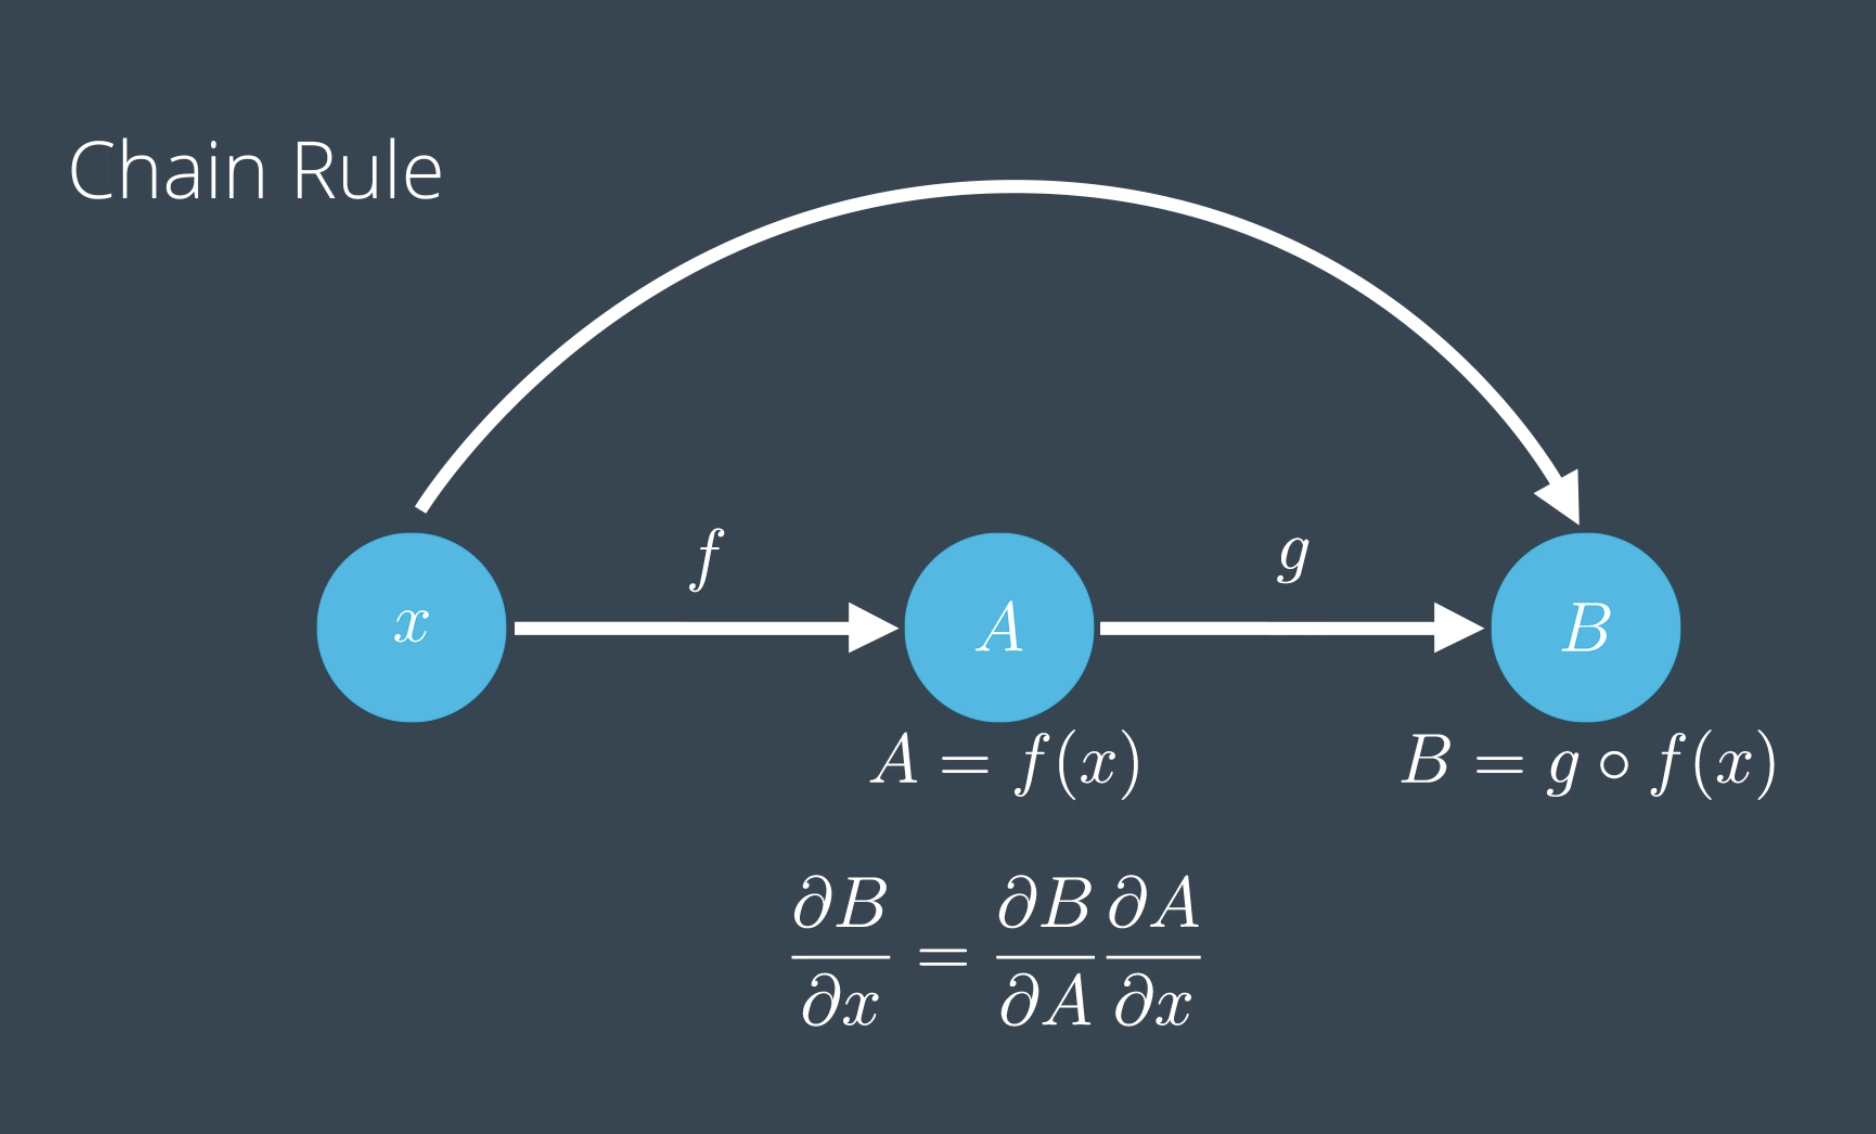

Example question: what is the update rule of the weight matrix W1 (or in other words: what is the partial derivative of y with respect to W1)?
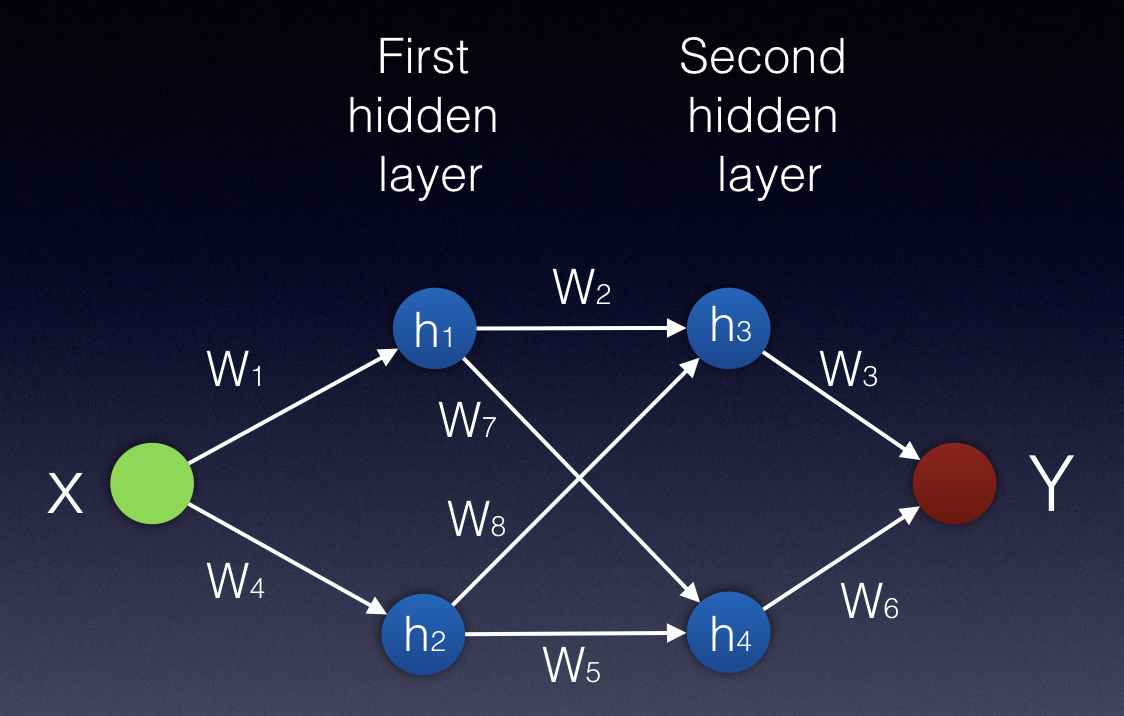

Equations:
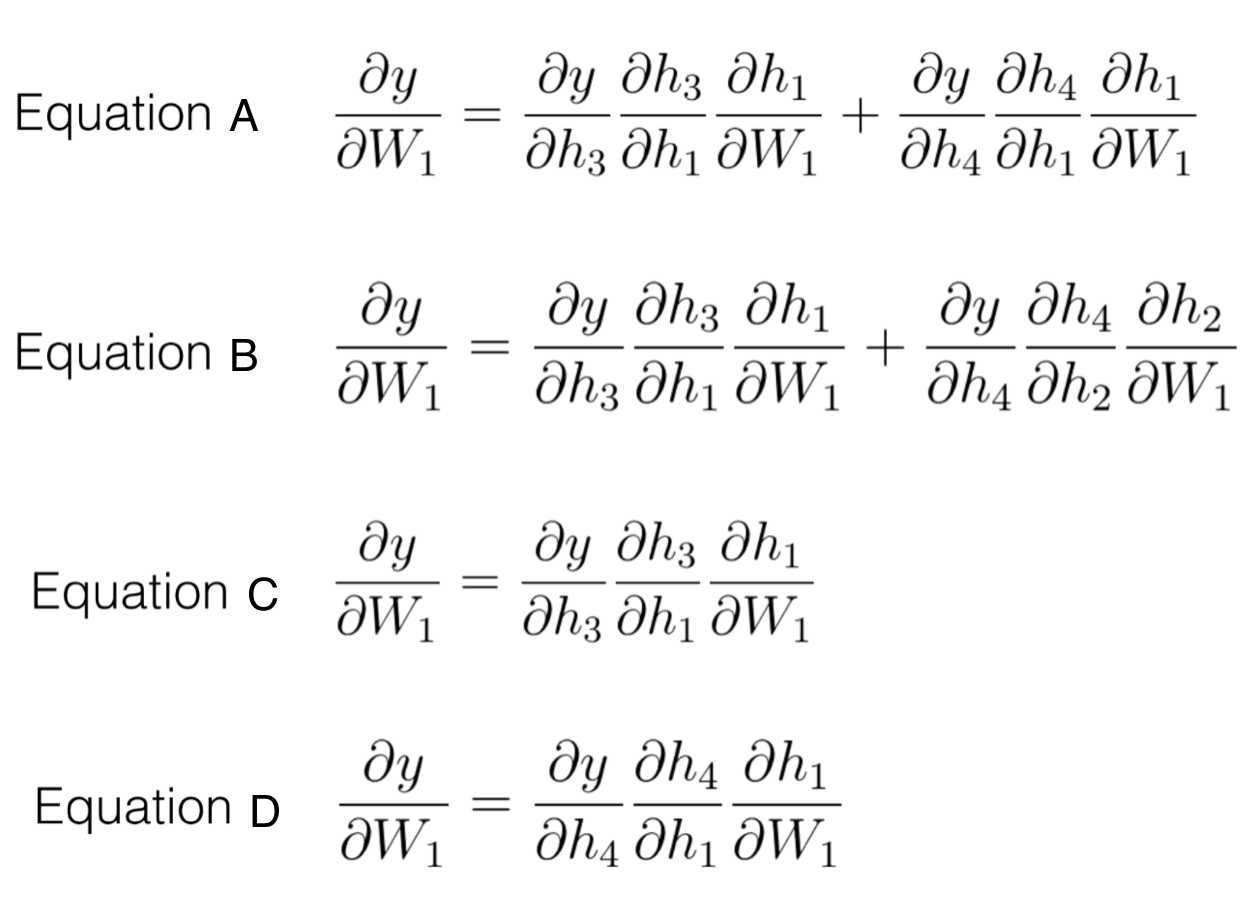

The answer is **equation A** since we need to consider all the paths contributing to the calculation of y.

## Recurrent Neural Networks

Temporal dependencies: dependencies over time. 

Simple RNN: also called Elman Network.

There are two main differences between FFNNs and RNNs. The RNNs use:
- **sequences** as inputs in the training phase, and
- **memory elements** where memory is defined as output of previous hiddel layer neuros

The RNN folded model:

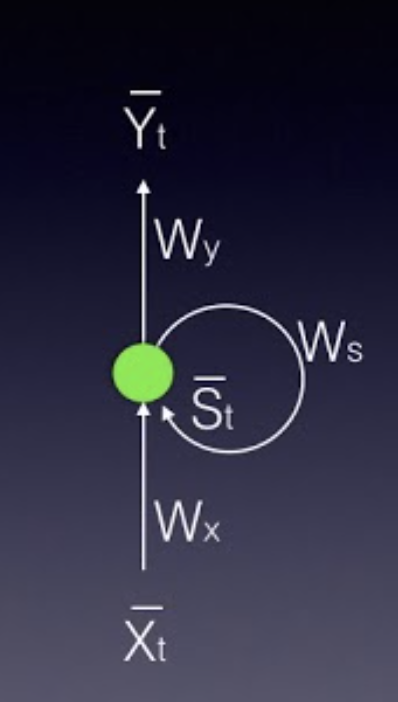

The unfolded RNN model is usually what we use:

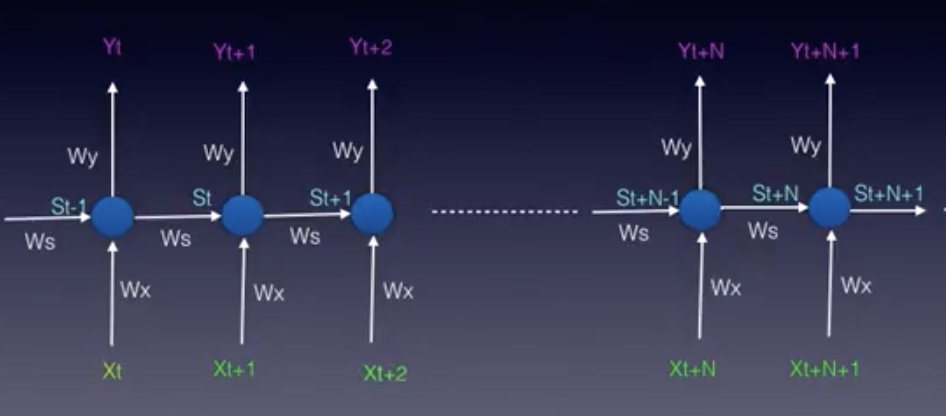

Closeup of RNN neuron: we see that we have simple linear combinations (with or without an activation function). We can also see that we have a single addition.

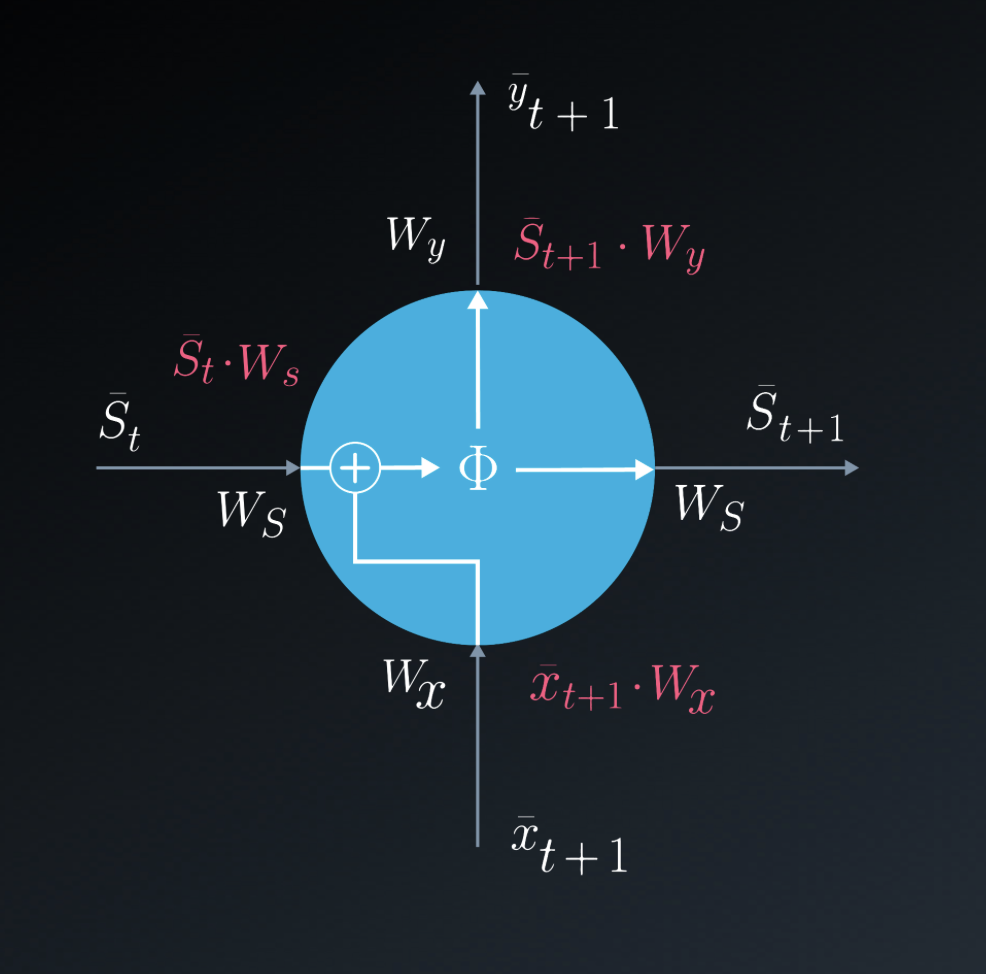

Different representation of the same model:

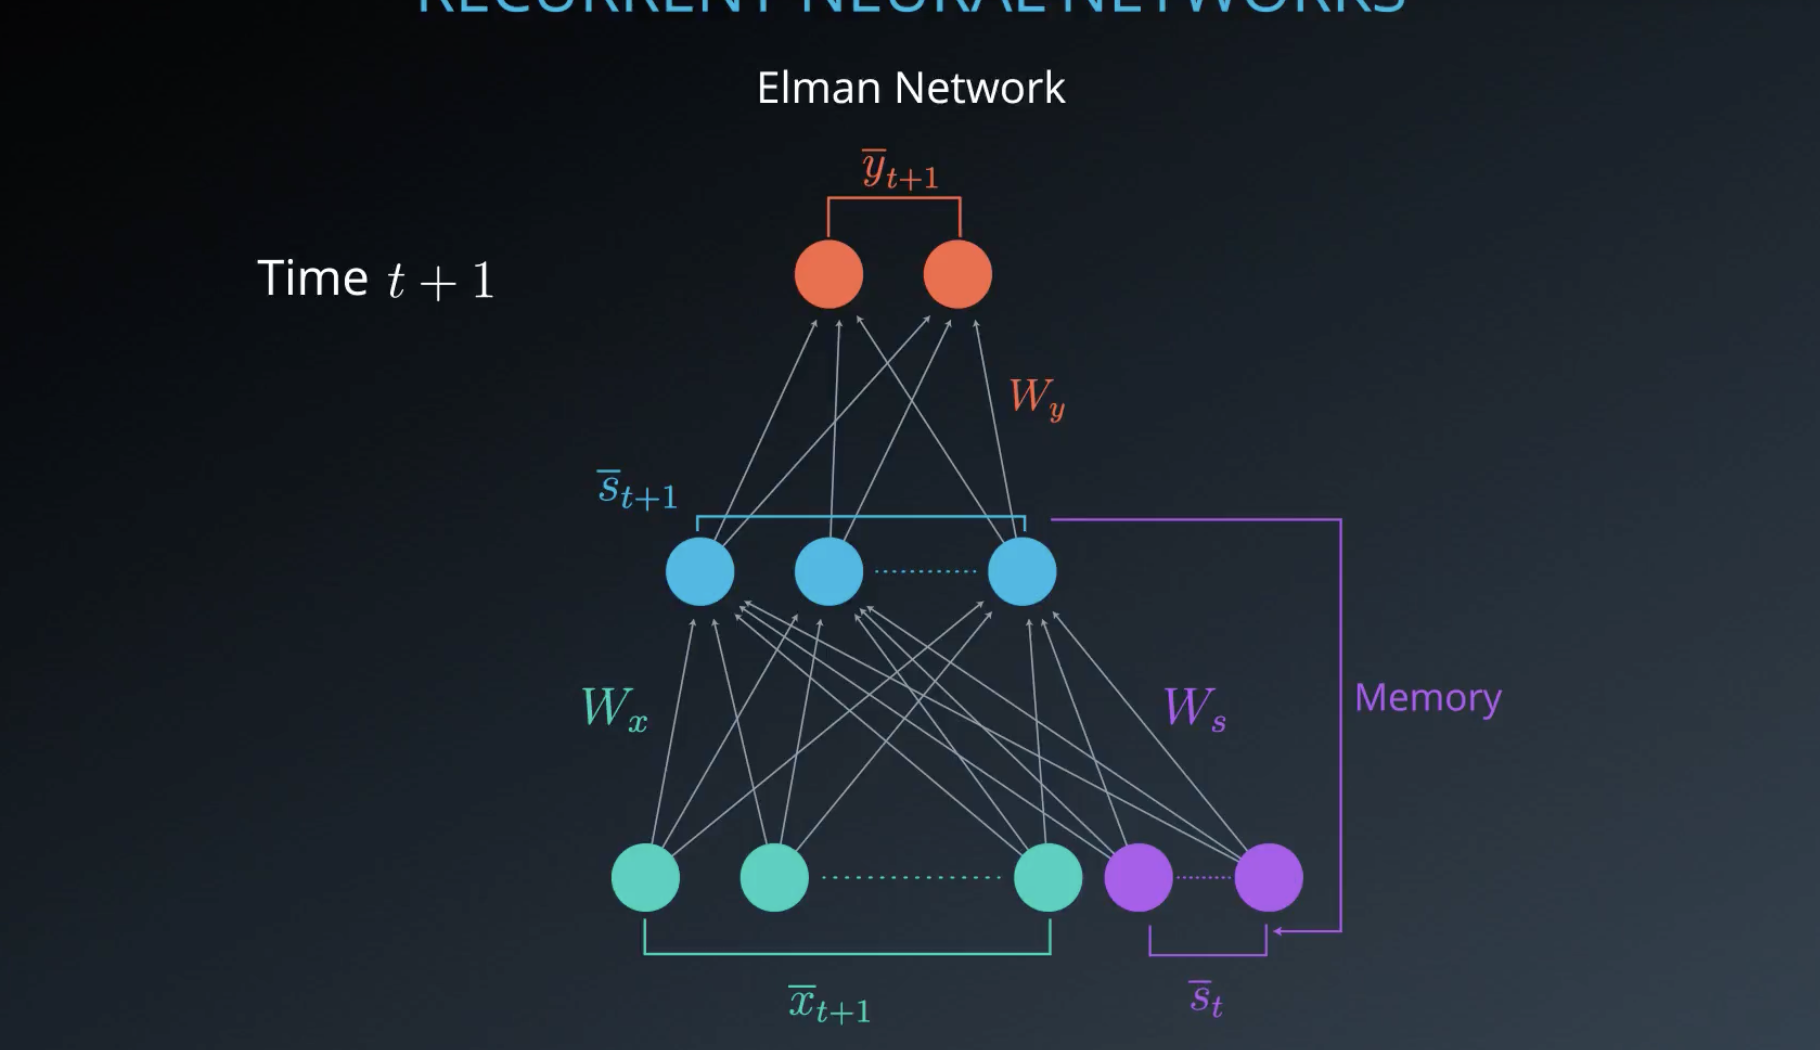

## Backpropagation through time (BPTT)

Consider a RNN with 1 hidden layer. When using backpropagation, we have to calculate three gradients:
- Gradient of $W_y$
- Gradient of state vector S denoted as $W_s$
- Gradient of input variables x, denoted as $W_x$

When calculating the gradient of the weights of X and S, we need to use backpropagtion through time to also consider previous time steps.

Example question: What is the update rule of weight matrix V1 at time t, over a single timestep?

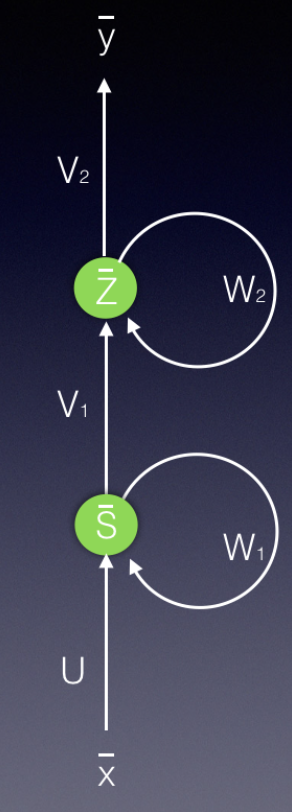

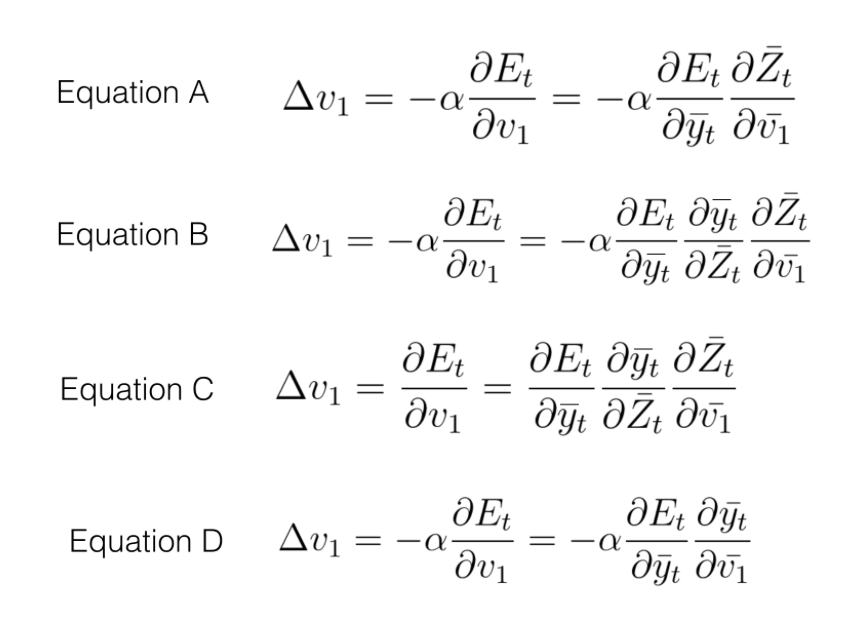

Answer is **equation B**

### Vanishing gradient problem
If we backpropagate more than ~10 timesteps, the gradient will become too small. This phenomenon is known as the vanishing gradient problem, where the contribution of information decays geometrically over time. Therefore, the network will effectively discard temporal dependencies that span many time steps. Long Short-Term Memory (LSTM) cells were designed to solve this problem specifically.

### Exploding gradient problem
In RNNs we can also have the opposite problem, called the exploding gradient problem, in which the value of the gradient grows uncontrollably. A simple solution for the exploding gradient problem is Gradient Clipping.

## Word Embeddings

Help us convert our vocabulary to vectors of numerical values called embeddings.

### Data & subsampling

We use subsampling to remove the most frequent words from our training data to eliminate stop words from our model. This improves the performance of our model by reducing the number of words and filtering for the most important words.
